In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import sqlite3
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.validation import check_array
import os

In [2]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')

In [3]:
#Database https://www.kaggle.com/unsdsn/world-happiness
df = pd.read_csv('2015.csv', encoding='latin1')

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features.

Outcome Variable: Happiness Score
Categorical Variable: Region
Continuous: Family, Freedom, Government Curroption

---

Exploring the Variables (Univariate)

In [5]:
reg = df['Region'].value_counts()
print('Regions:\n', reg)

regmiss = df['Region'].shape[0] - df['Region'].dropna().shape[0]
print("We are missing {} records.".format(regmiss))

Regions:
 Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64
We are missing 0 records.


In [6]:
family = df['Family']
print(family.describe())

count    158.000000
mean       0.991046
std        0.272369
min        0.000000
25%        0.856823
50%        1.029510
75%        1.214405
max        1.402230
Name: Family, dtype: float64


In [7]:
free = df['Freedom']
print(free.describe())

count    158.000000
mean       0.428615
std        0.150693
min        0.000000
25%        0.328330
50%        0.435515
75%        0.549092
max        0.669730
Name: Freedom, dtype: float64


In [8]:
govt = df['Trust (Government Corruption)']
print(govt.describe())

count    158.000000
mean       0.143422
std        0.120034
min        0.000000
25%        0.061675
50%        0.107220
75%        0.180255
max        0.551910
Name: Trust (Government Corruption), dtype: float64


---

Exploring the Variables (bivariate)

In [9]:
df_eu = df.loc[(df['Region'] == 'Central and Eastern Europe') | (df['Region'] == 'Western Europe'), ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)', 'Generosity']]
df_eu.head(3)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


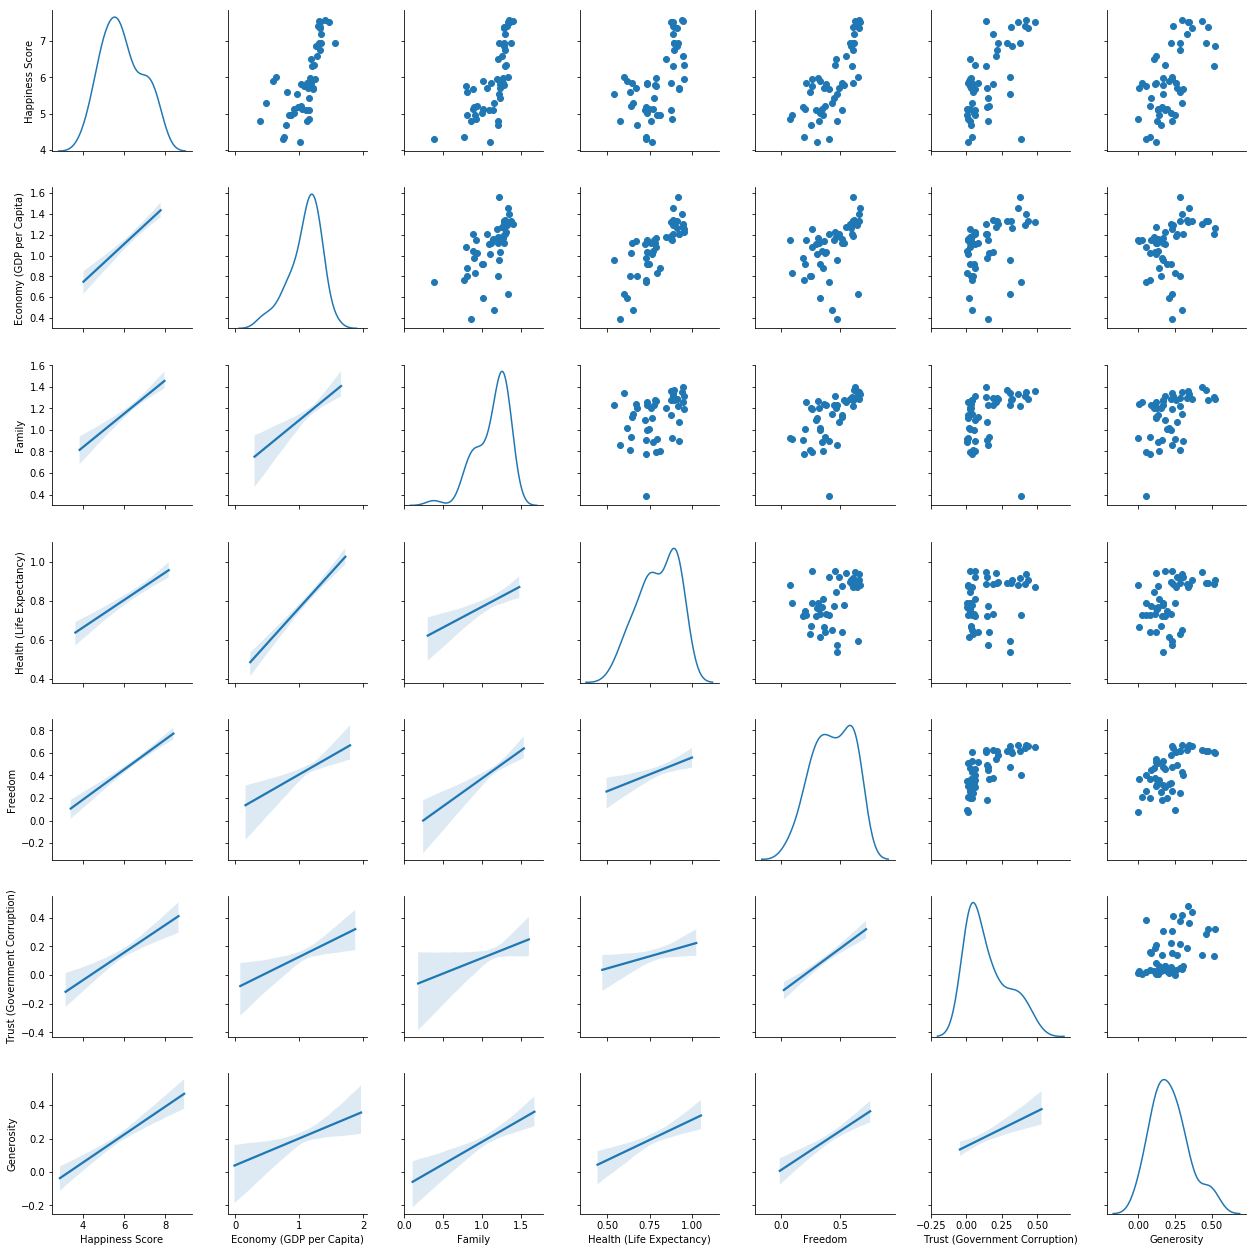

In [10]:
x = sns.PairGrid(df_eu, diag_sharey=False)
x.map_upper(plt.scatter)
x.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
x.map_diag(sns.kdeplot)
plt.show()

In [11]:
corr = df_eu.corr()
print(corr)

                               Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.701309   
Economy (GDP per Capita)              0.701309                  1.000000   
Family                                0.711239                  0.578645   
Health (Life Expectancy)              0.591452                  0.794833   
Freedom                               0.765493                  0.485848   
Trust (Government Corruption)         0.647812                  0.387237   
Generosity                            0.629201                  0.313982   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Score                0.711239                  0.591452  0.765493   
Economy (GDP per Capita)       0.578645                  0.794833  0.485848   
Family                         1.000000                  0.388262  0.620487   
Health (Life Expectancy)       0.388262                  1.000000  0.408345

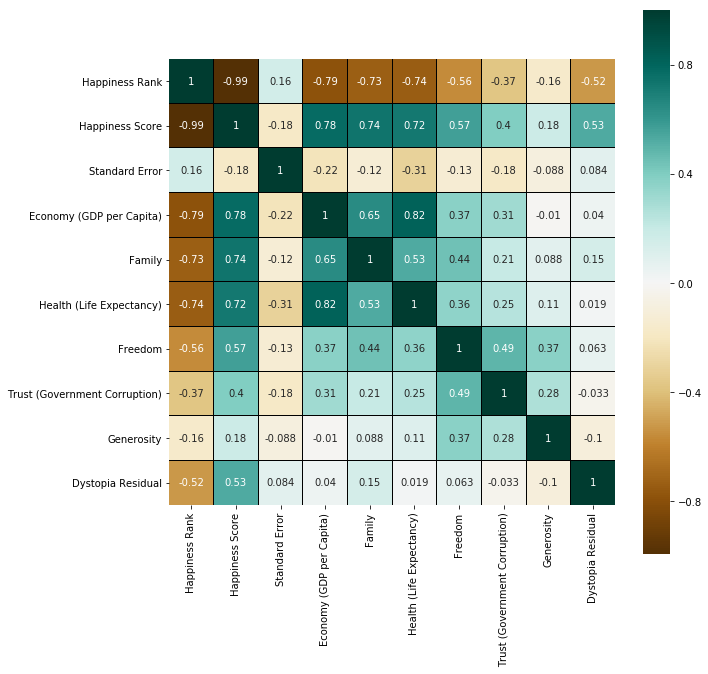

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

---

Data Exploration and Creating 10 Features w/ explanations

In [24]:
gov_reshape=np.array(df['Trust (Government Corruption)']).reshape(-1,1)
gov_scale=StandardScaler().fit_transform(gov_reshape)

family_reshape=np.array(df['Family']).reshape(-1,1)
fam_scale=StandardScaler().fit_transform(family_reshape)

freedom_reshape=np.array(df['Freedom']).reshape(-1,1)
free_scale=StandardScaler().fit_transform(freedom_reshape)

health_reshape=np.array(df['Health (Life Expectancy)']).reshape(-1,1)
health_scale=StandardScaler().fit_transform(health_reshape)

econ_reshape=np.array(df['Economy (GDP per Capita)']).reshape(-1,1)
econ_scale=StandardScaler().fit_transform(econ_reshape)

hap_reshape=np.array(df['Happiness Score']).reshape(-1,1)
hap_scale=StandardScaler().fit_transform(hap_reshape)

gen_reshape=np.array(df['Generosity']).reshape(-1,1)
gen_scale=StandardScaler().fit_transform(freedom_reshape)

These seven different features were designed to standard scale each of the columns within the data frame.  This way it will setup the data for future optimization.

In [26]:
data_matrix=np.empty((158,7))
data_matrix[:,0]=gov_scale[:,0]
data_matrix[:,1]=fam_scale[:,0]
data_matrix[:,2]=free_scale[:,0]
data_matrix[:,3]=health_scale[:,0]
data_matrix[:,4]=econ_scale[:,0]
data_matrix[:,5]=hap_scale[:,0]
data_matrix[:,6]=gen_scale[:,0]

In [27]:
pca = PCA(n_components=2)
reduced_data=pca.fit_transform(data_matrix)
print(pca.explained_variance_ratio_)  

[0.59475021 0.19451399]
